# CHURN PREDICTION USING MULTI LAYER PERCEPTRON 
## Binary Classification using MLP

### Import basic libraries

In [1]:
import numpy as np
import pandas as pd

### Import the Dataset - Churn Dataset

In [2]:
path = '/kaggle/input/churn-prediction-for-credit-card-customer'
data = pd.read_csv('/kaggle/input/churn-prediction-for-credit-card-customer/Churn.csv')

In [3]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### List the Numerical Features

In [4]:
# Check which is numerical featue

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#### Check for duplicates


In [5]:
data.duplicated().sum()

0

#### Convert Categorical to Numerical - One hot encoding

In [6]:
## Create a dummy variable for each categorical feature
df = pd.get_dummies(data,columns=['Geography','Gender'],drop_first = True) #  We have dropped france. If there is no germany and Spain, Its France.
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


#### Divide df into features and target

In [7]:
x = df.drop(columns=['Exited'])
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [8]:
# Target
y = df['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

# train_x,train_y  - Training data , Training output
# test_x, test_y - Testing Data Input, Compare model output with test_y


train_x, test_x, train_y, test_y = train_test_split(x,y,
                                                    test_size=0.2,
                                                    random_state=108
                                                    )


#### Shape of Train and Test Batches

In [10]:
## Train data and test data will be in same shape
## y is for prediction dont have a Target value

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((8000, 11), (2000, 11), (8000,), (2000,))

### Data Preprocessing

In [11]:
#Standardize the data

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

train_x_scale = scale.fit_transform(train_x)
test_x_scale = scale.fit_transform(test_x)

### Model Building

In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [13]:
data.shape

(10000, 11)

### Adding Layers, Activation 

In [14]:
model = Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid')) # Output layer

In [15]:
model.summary()
# First layer --> 3 Dense layers
# Output Layer --> 1 Dense layer
# Total 40 trainable parameters

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


### Model Compilation

In [16]:
# Model is built,  now compilation stage
# Which Loss functio and Optimizer to use

model.compile(loss='binary_crossentropy',optimizer='Adam') # loss binary classification (logloss)

# loss brings the error, Adam backpropogates and updates Weights and Bias before each epochs

### Model Fitting / Training

In [17]:
# History

hist = model.fit(train_x_scale,train_y, epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.7996
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.6181
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5235
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4790
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4584
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4476
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4407
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4359
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4321
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4293


#### Increase the Epochs

In [18]:
# run again, itll start from minimum loss 

hist = model.fit(train_x_scale,train_y, epochs=12)

Epoch 1/12
250/250 [==============================] - 0s 1ms/step - loss: 0.4272
Epoch 2/12
250/250 [==============================] - 0s 2ms/step - loss: 0.4256
Epoch 3/12
250/250 [==============================] - 0s 2ms/step - loss: 0.4245
Epoch 4/12
250/250 [==============================] - 0s 2ms/step - loss: 0.4237
Epoch 5/12
250/250 [==============================] - 0s 2ms/step - loss: 0.4231
Epoch 6/12
250/250 [==============================] - 0s 2ms/step - loss: 0.4226
Epoch 7/12
250/250 [==============================] - 0s 2ms/step - loss: 0.4221
Epoch 8/12
250/250 [==============================] - 0s 2ms/step - loss: 0.4217
Epoch 9/12
250/250 [==============================] - 0s 2ms/step - loss: 0.4212
Epoch 10/12
250/250 [==============================] - 0s 2ms/step - loss: 0.4207
Epoch 11/12
250/250 [==============================] - 0s 2ms/step - loss: 0.4202
Epoch 12/12
250/250 [==============================] - 0s 2ms/step - loss: 0.4194


In [19]:
# See how loss decreases
hist.history

{'loss': [0.42720237374305725,
  0.42562082409858704,
  0.42451712489128113,
  0.4237106740474701,
  0.42306002974510193,
  0.4225560426712036,
  0.4220609962940216,
  0.42165228724479675,
  0.4212222695350647,
  0.42069146037101746,
  0.4201727509498596,
  0.4194357991218567]}

#### Plot the Loss

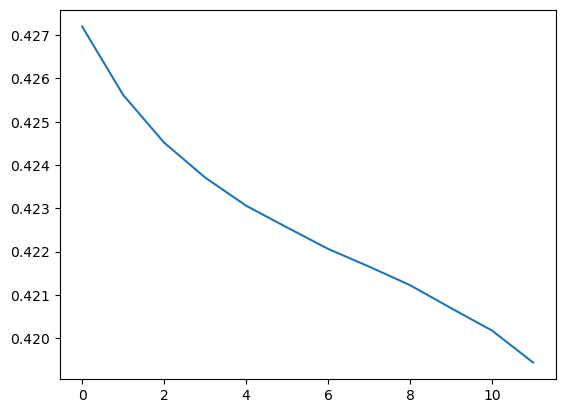

In [20]:
# Plot the loss
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.show()

### Weights and Bias in each layer

In [21]:
# TO know abt weights and biases in First Hidden Layer
model.layers[0].get_weights()

[array([[-0.03765679, -0.18283466,  0.00283872],
        [-1.2315378 ,  2.6238828 , -2.0022252 ],
        [ 0.33911574, -0.05833374, -0.13518143],
        [-0.68919915,  0.01674364, -0.23410754],
        [ 0.11459322,  0.10743964,  0.2899412 ],
        [ 0.25989553,  0.04126747, -0.04741899],
        [ 1.2863064 , -0.02530185,  0.8012578 ],
        [ 0.15443729,  0.2010533 , -0.07922583],
        [-0.6535194 ,  0.35824853, -0.65970093],
        [-0.16999662, -0.18697216,  0.08599296],
        [ 0.9280664 , -0.13532856,  0.48856634]], dtype=float32),
 array([ 0.5582487 , -0.42191863,  0.8128882 ], dtype=float32)]

Its of the Form of 
* weights - 11*3 --> Features * 3 Nodes
* bias - 3 --> One bias to Each Nodes

In [22]:
# Weights and Biases in Output Layer
model.layers[1].get_weights()

[array([[-1.0574646 ],
        [ 0.99363685],
        [-1.2472576 ]], dtype=float32),
 array([-0.6720418], dtype=float32)]

* Weights - 3*1 --> Output from previous layer 3 nodes 
* Bias - One node in this layer

### Predicting the model

In [23]:
# Predict the model

model.predict(test_x_scale) 

63/63 [==============================] - 0s 1ms/step


array([[0.18845913],
       [0.07540324],
       [0.10159832],
       ...,
       [0.09968058],
       [0.06909207],
       [0.06960746]], dtype=float32)

In [24]:
# Since its in sigmoid, it list as prob
## Set a Threshold and list it a Binary code

y_pred = np.where(model.predict(test_x_scale)>0.5,1,0)
y_pred

63/63 [==============================] - 0s 844us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Model Performance

In [25]:
# Performance of a model

from sklearn.metrics import accuracy_score

accuracy_score(test_y,y_pred)

0.8

## Hyper Parameter Tuning

There are many ways to improve the Performance of the Model 
**Hyper Parameter Tuning**

* *Change the number of Layers*
* *Increase number of nodes*
* *Change the Activation Layers*
* *Increse the number of epochs*

## Model Building

In [26]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


### Compile

In [27]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [28]:
hist = model.fit(train_x_scale,train_y,epochs=40,validation_split=0.2)

Epoch 1/40
200/200 [==============================] - 1s 4ms/step - loss: 0.6129 - accuracy: 0.6644 - val_loss: 0.4764 - val_accuracy: 0.8106
Epoch 2/40
200/200 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 0.7992 - val_loss: 0.4400 - val_accuracy: 0.8106
Epoch 3/40
200/200 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.8053 - val_loss: 0.4185 - val_accuracy: 0.8163
Epoch 4/40
200/200 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8173 - val_loss: 0.4053 - val_accuracy: 0.8263
Epoch 5/40
200/200 [==============================] - 0s 2ms/step - loss: 0.4055 - accuracy: 0.8267 - val_loss: 0.3947 - val_accuracy: 0.8288
Epoch 6/40
200/200 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8359 - val_loss: 0.3857 - val_accuracy: 0.8406
Epoch 7/40
200/200 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8425 - val_loss: 0.3798 - val_accuracy: 0.8469
Epoch 

Loss is decreased resulting in a better performance

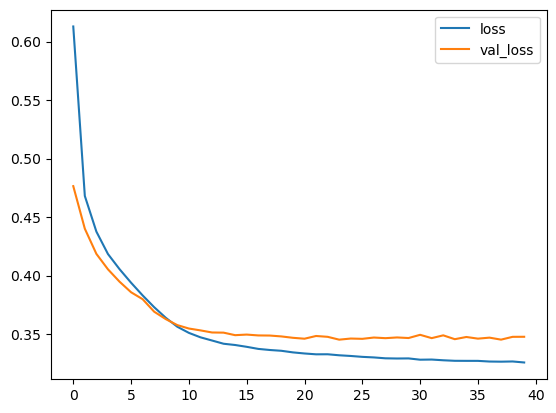

In [29]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

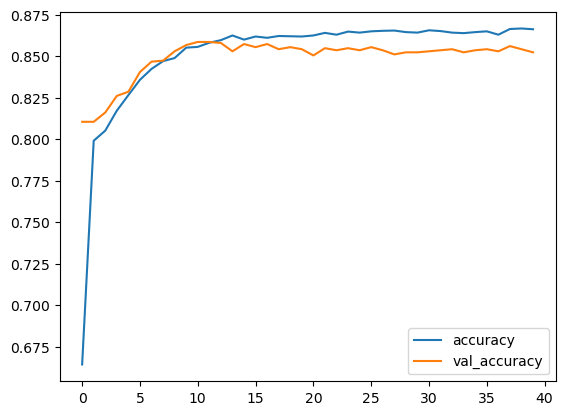

In [30]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [31]:
y_pred = np.where(model.predict(test_x_scale)>0.5,1,0)
y_pred

63/63 [==============================] - 0s 794us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Better Accuracy 

In [32]:
accuracy_score(test_y,y_pred)

0.8515

## KERAS IMPORT AND FRAMEWORKS

from keras.models import Sequential

from keras.layers import Dense

from keras.activations import tanh,sigmoid

from keras.optimizers import Adam

from keras.preprocessing import image

from keras.applications import vgg16

seq = Sequential()

seq.add(Dense(units=1,activation=sigmoid))

model.compile(optimizer=Adam)

image.load_img('image/path/img.jpg')

seq =  vgg16.VGG16(weights='imagenet')